<a href="https://colab.research.google.com/github/heros-lab/colaboratory/blob/master/verfication_results2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# +++ Import Packages for Experiments +++
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ptick

from google.colab import drive
drive.mount('/content/drive')

work_path = "/content/drive/My Drive/Colab Notebooks"


In [2]:
class DatasetClass:
    def __init__(self, data_path):
        self.path = data_path
    
    def __reflect_index(self, data, index):
        if index != None:
            data = data[:, index]
        return data
        
    def __load_df(self, data_label):
        data_x = pd.read_csv(f"{self.path}/{data_label}_x.csv", index_col=0)
        data_y = pd.read_csv(f"{self.path}/{data_label}_y.csv", index_col=0)
        return data_x, data_y
    
    def __load_data(self, data_label, x_index, y_index):
        data_x, data_y = self.__load_df(data_label)
        data_x = self.__reflect_index(data_x.values, x_index)
        data_y = self.__reflect_index(data_y.values, y_index)
        return data_x, data_y
    
    def __load_stack(self, dataset_list, x_index, y_index):
        for label in dataset_list:
            tmp_x, tmp_y = self.__load_data(label, x_index, y_index)
            if dataset_list.index(label) == 0:
                data_x = tmp_x
                data_y = tmp_y
            else:
                data_x = np.vstack((data_x, tmp_x))
                data_y = np.vstack((data_y, tmp_y))
        return data_x, data_y
    
    def __load_dict(self, dataset_list, x_index, y_index):
        data_x, data_y = {}, {}
        for label in dataset_list:
            tmp_x, tmp_y = self.__load_data(label, x_index, y_index)
            data_x[label] = tmp_x
            data_y[label] = tmp_y
        return data_x, data_y
    
    def get_data(self, dataset_label, x_index=None, y_index=None, dict_type:bool=False):
        if not dict_type:
            if type(dataset_label) == str:
                data_x, data_y = self.__load_data(dataset_label, x_index, y_index)
            else:
                data_x, data_y = self.__load_stack(dataset_label, x_index, y_index)
        else:
            data_x, data_y = self.__load_dict(dataset_label, x_index, y_index)
        return data_x, data_y
    
    def get_dataframe(self, dataset_list):
        data_x = {}
        data_y = {}
        for label in dataset_list:
            tmp_x, tmp_y = self.__load_df(label)
            data_x[label] = tmp_x
            data_y[label] = tmp_y
        return data_x, data_y

class NormsDatasetClass:
    def __init__(self, data_path):
        self.path = data_path
    
    def __reflect_index(self, data, index):
        if index != None:
            data = data[:, index]
        return data
        
    def __load_df(self, data_label):
        data_x = pd.read_csv(f"{self.path}/{data_label}_nx.csv", index_col=0)
        data_y = pd.read_csv(f"{self.path}/{data_label}_ny.csv", index_col=0)
        return data_x, data_y
    
    def __load_data(self, data_label, x_index, y_index):
        data_x, data_y = self.__load_df(data_label)
        data_x = self.__reflect_index(data_x.values, x_index)
        data_y = self.__reflect_index(data_y.values, y_index)
        return data_x, data_y
    
    def __load_stack(self, dataset_list, x_index, y_index):
        for label in dataset_list:
            tmp_x, tmp_y = self.__load_data(label, x_index, y_index)
            if dataset_list.index(label) == 0:
                data_x = tmp_x
                data_y = tmp_y
            else:
                data_x = np.vstack((data_x, tmp_x))
                data_y = np.vstack((data_y, tmp_y))
        return data_x, data_y
    
    def __load_dict(self, dataset_list, x_index, y_index):
        data_x, data_y = {}, {}
        for label in dataset_list:
            tmp_x, tmp_y = self.__load_data(label, x_index, y_index)
            data_x[label] = tmp_x
            data_y[label] = tmp_y
        return data_x, data_y
    
    def get_data(self, dataset_label, x_index=None, y_index=None, dict_type:bool=False):
        if not dict_type:
            if type(dataset_label) == str:
                data_x, data_y = self.__load_data(dataset_label, x_index, y_index)
            else:
                data_x, data_y = self.__load_stack(dataset_label, x_index, y_index)
        else:
            data_x, data_y = self.__load_dict(dataset_label, x_index, y_index)
        return data_x, data_y
    
    def get_dataframe(self, dataset_list):
        data_x = {}
        data_y = {}
        for label in dataset_list:
            tmp_x, tmp_y = self.__load_df(label)
            data_x[label] = tmp_x
            data_y[label] = tmp_y
        return data_x, data_y

In [3]:
def filtering(data_list):
        pd_series = pd.Series(data_list)
        q1 = pd_series.quantile(.25)
        q3 = pd_series.quantile(.75)
        iqr = q3 - q1
        lim_upper = q3 + iqr*1.5
        lim_lower = q1 - iqr*1.5
        #return pd_series[pd_series.apply(lambda x:lim_lower < x < lim_upper)]
        return pd_series.apply(lambda x:lim_lower < x < lim_upper)

In [4]:
def norms(x_vec, x_max:float, x_min:float):
    norm = np.vectorize(lambda x:(x - x_min)/(x_max - x_min))
    return norm(x_vec)

def restore(x_vec, x_max:float, x_min:float):
    rest = np.vectorize(lambda x: (x_max - x_min)*x+x_min)
    return rest(x_vec)

x_max = [2.79251417013236, 1001.76434281299, 11.1129894774574, 50.878307668365]
x_min = [-1.68539431728585, -8.00252854145341, -14.5050341893581, -46.6201668706979]

In [93]:
model_c = "Conv.2"
model_p = "Prop.2"
test_name = ["ms1a", "free", "step"]
type_id = 0

dataset = DatasetClass(f"{work_path}/data")
dataset_norm = NormsDatasetClass(f"{work_path}/data/norms")
plot_x, plot_y = dataset.get_data(test_name, y_index=[type_id], dict_type=True)
test_x, test_y = dataset_norm.get_data(test_name, y_index=[type_id], dict_type=True)

df_msrs_c = pd.read_csv(f"{work_path}/estimated_response/{model_c}_msrs.csv", index_col=0)
df_free_c = pd.read_csv(f"{work_path}/estimated_response/{model_c}_free.csv", index_col=0)
df_step_c = pd.read_csv(f"{work_path}/estimated_response/{model_c}_step.csv", index_col=0)

df_msrs_p = pd.read_csv(f"{work_path}/estimated_response/{model_p}_msrs.csv", index_col=0)
df_free_p = pd.read_csv(f"{work_path}/estimated_response/{model_p}_free.csv", index_col=0)
df_step_p = pd.read_csv(f"{work_path}/estimated_response/{model_p}_step.csv", index_col=0)


In [94]:
# 外れ値を含むサンプルの検出
error_msrs_c = df_msrs_c.values - test_y[test_name[0]]
error_msrs_p = df_msrs_p.values - test_y[test_name[0]]
rms_msrs_c = np.sqrt((error_msrs_c**2).mean(axis=0))
rms_msrs_p = np.sqrt((error_msrs_p**2).mean(axis=0))
index_c = filtering(rms_msrs_c)
index_p = filtering(rms_msrs_p)

# 外れ値を除いた推定値の算出
resp_msrs_c = df_msrs_c.values[:,index_c].mean(axis=1)
resp_free_c = df_free_c.values[:,index_c].mean(axis=1)
resp_step_c = df_step_c.values[:,index_c].mean(axis=1)
resp_msrs_p = df_msrs_p.values[:,index_p].mean(axis=1)
resp_free_p = df_free_p.values[:,index_p].mean(axis=1)
resp_step_p = df_step_p.values[:,index_p].mean(axis=1)
print(f"Conv. model's sample is {df_msrs_c.values[:, index_c].shape[1]}/101")
print(f"Prop. model's sample is {df_msrs_p.values[:, index_p].shape[1]}/101")

# 正規化した推定値の復元
resp_msrs_c = restore(resp_msrs_c, x_max[type_id], x_min[type_id])
resp_free_c = restore(resp_free_c, x_max[type_id], x_min[type_id])
resp_step_c = restore(resp_step_c, x_max[type_id], x_min[type_id])
resp_msrs_p = restore(resp_msrs_p, x_max[type_id], x_min[type_id])
resp_free_p = restore(resp_free_p, x_max[type_id], x_min[type_id])
resp_step_p = restore(resp_step_p, x_max[type_id], x_min[type_id])

# 推定誤差の算出
error_msrs_c = plot_y[test_name[0]][:, 0] - resp_msrs_c
error_free_c = plot_y["free"][:, 0] - resp_free_c
error_step_c = plot_y["step"][:, 0] - resp_step_c
error_msrs_p = plot_y[test_name[0]][:, 0] - resp_msrs_p
error_free_p = plot_y["free"][:, 0] - resp_free_p
error_step_p = plot_y["step"][:, 0] - resp_step_p


ValueError: ignored

In [90]:
def rms(x_vec):
    return np.sqrt((x_vec**2).mean())

In [91]:
rms_c = rms(error_msrs_c)
rms_p = rms(error_msrs_p)
print(f"ms2a: conv->{rms_c:.4e}, prop->{rms_p:.4e}")
rms_c = rms(error_free_c)
rms_p = rms(error_free_p)
print(f"free: conv->{rms_c:.4e}, prop->{rms_p:.4e}")
rms_c = rms(error_step_c)
rms_p = rms(error_step_p)
print(f"step: conv->{rms_c:.4e}, prop->{rms_p:.4e}")

ms2a: conv->1.6302e+00, prop->1.6284e+00
free: conv->1.7293e+00, prop->1.7189e+00
step: conv->1.2412e+00, prop->1.2535e+00


In [92]:
time10 = np.arange(0,10,0.001)
time20 = np.arange(0,20,0.001)

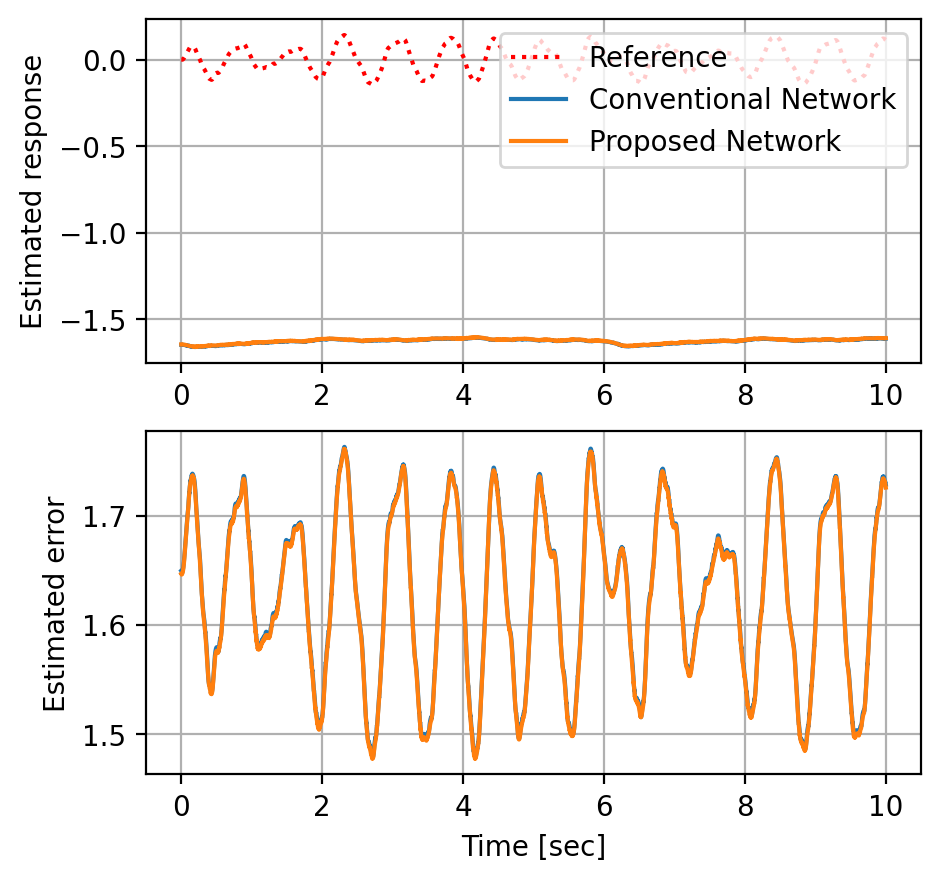

In [85]:
fig, ax = plt.subplots(2, 1, figsize=(5, 5), dpi=200)
plot_y_ms = plot_y[test_name[0]][:,0]

ax[0].plot(time10, plot_y_ms, "r:")
ax[0].plot(time10, resp_msrs_c)
ax[0].plot(time10, resp_msrs_p)
ax[0].set_ylabel("Estimated response")
ax[0].legend(["Reference", "Conventional Network", "Proposed Network"], loc=1)
ax[0].grid()

ax[1].plot(time10, error_msrs_c)
ax[1].plot(time10, error_msrs_p)
ax[1].set_ylabel("Estimated error")
ax[1].set_xlabel("Time [sec]")
ax[1].grid()

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(5, 5), dpi=300)
plot_y_free = plot_y["free"][:,0]

ax[0].plot(time20, plot_y_free, "r:")
ax[0].plot(time20, resp_free_c)
ax[0].plot(time20, resp_free_p)
ax[0].set_ylabel("Estimated response")
ax[0].legend(["Reference", "Conventional Network", "Proposed Network"], loc=1)
ax[0].grid()

ax[1].plot(time20, error_free_c)
ax[1].plot(time20, error_free_p)
ax[1].set_ylabel("Estimated error")
ax[1].set_xlabel("Time [sec]")
ax[1].grid()

ax3 = plt.axes([0.28, 0.275, 0.6, 0.15])
ax3.plot(time20[5000:], error_free_c[5000:])
ax3.plot(time20[5000:], error_free_p[5000:])
ax3.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))
ax3.ticklabel_format(style="sci", axis="y", scilimits=(0,0))
ax3.yaxis.offsetText.set_fontsize(9)
ax3.grid()

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(5, 5), dpi=300)
plot_y_step = plot_y["step"][:,0]

ax[0].plot(time20, plot_y_step, "r:")
ax[0].plot(time20, resp_step_c)
ax[0].plot(time20, resp_step_p)
ax[0].set_ylabel("Estimated response")
ax[0].legend(["Reference", "Conventional Network", "Proposed Network"], loc=1)
ax[0].grid()

ax[1].plot(time20, error_step_c)
ax[1].plot(time20, error_step_p)
ax[1].set_ylabel("Estimated error")
ax[1].set_xlabel("Time [sec]")
ax[1].grid()